# Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)
pd.set_option("display.width", 500)
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
df = pd.read_csv("C:/Users/ADMIN/Incident Impact project/Excelr Project/perfectdata.csv")
df.drop(columns = "Unnamed: 0", inplace = True)

In [3]:
df.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,Created_by,updated_by,type_contact,location,category_ID,user_symptom,impact,Support_group,support_incharge,Doc_knowledge,confirmation_check,notify,created_date,created_time,updated_date,updated_time,opened_date,opened_time
0,INC0000045,New,True,0,0,0,2403,8,6,21,Phone,143,55,72,2,56,17,True,False,Do Not Notify,2016-02-29 00:00:00,1900-01-01 01:23:00,2016-02-29 00:00:00,1900-01-01 01:23:00,2016-02-29 00:00:00,1900-01-01 01:16:00
1,INC0000045,Resolved,True,0,0,3,2403,8,6,804,Phone,143,55,72,2,56,17,True,False,Do Not Notify,2016-02-29 00:00:00,1900-01-01 01:23:00,2016-02-29 00:00:00,1900-01-01 11:29:00,2016-02-29 00:00:00,1900-01-01 01:16:00
2,INC0000045,Closed,False,0,0,4,2403,8,6,908,Phone,143,55,72,2,56,17,True,False,Do Not Notify,2016-02-29 00:00:00,1900-01-01 01:23:00,2016-03-05 00:00:00,1900-01-01 12:00:00,2016-02-29 00:00:00,1900-01-01 01:16:00
3,INC0000047,Active,True,1,0,1,2403,397,171,21,Phone,165,40,471,2,24,31,True,False,Do Not Notify,2016-02-29 00:00:00,1900-01-01 04:57:00,2016-02-29 00:00:00,1900-01-01 05:30:00,2016-02-29 00:00:00,1900-01-01 04:40:00
4,INC0000047,Active,True,1,0,2,2403,397,171,21,Phone,165,40,471,2,24,31,True,False,Do Not Notify,2016-02-29 00:00:00,1900-01-01 04:57:00,2016-02-29 00:00:00,1900-01-01 05:33:00,2016-02-29 00:00:00,1900-01-01 04:40:00


#### work on the categorical and boolean features type_contact, active, Doc_knowledge, confirmation_check, ID_status, notify

In [4]:
df['Doc_knowledge'].value_counts()

False    116349
True      25363
Name: Doc_knowledge, dtype: int64

In [5]:
modified_df = pd.get_dummies(data = df, columns = ['type_contact', 'Doc_knowledge', 'active', 'confirmation_check', 'notify', 'ID_status'], drop_first = True)

In [6]:
df = modified_df

In [7]:
df.head(3)

,ID,count_reassign,count_opening,count_updated,ID_caller,opened_by,Created_by,updated_by,location,category_ID,user_symptom,impact,Support_group,support_incharge,created_date,created_time,updated_date,updated_time,opened_date,opened_time,type_contact_Email,type_contact_IVR,type_contact_Phone,type_contact_Self service,Doc_knowledge_True,active_True,confirmation_check_True,notify_Send Email,ID_status_Awaiting Evidence,ID_status_Awaiting Problem,ID_status_Awaiting User Info,ID_status_Awaiting Vendor,ID_status_Closed,ID_status_New,ID_status_Resolved
0,INC0000045,0,0,0,2403,8,6,21,143,55,72,2,56,17,2016-02-29 00:00:00,1900-01-01 01:23:00,2016-02-29 00:00:00,1900-01-01 01:23:00,2016-02-29 00:00:00,1900-01-01 01:16:00,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0
1,INC0000045,0,0,3,2403,8,6,804,143,55,72,2,56,17,2016-02-29 00:00:00,1900-01-01 01:23:00,2016-02-29 00:00:00,1900-01-01 11:29:00,2016-02-29 00:00:00,1900-01-01 01:16:00,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1
2,INC0000045,0,0,4,2403,8,6,908,143,55,72,2,56,17,2016-02-29 00:00:00,1900-01-01 01:23:00,2016-03-05 00:00:00,1900-01-01 12:00:00,2016-02-29 00:00:00,1900-01-01 01:16:00,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [8]:
#to check the duplicated that having the same ID number and the same opened_date
df.duplicated(subset = ['ID', 'opened_date', 'opened_time']).shape

(141712,)

In [9]:
#drop all unwanted duplicates
df.drop_duplicates(subset= ['ID', 'opened_date', 'opened_time'], keep = 'last', inplace = True)

In [10]:
df.shape

(24918, 35)

In [11]:
#created_date and created_time are the data anomalies, it doesn't make impact to predict the model
df.drop(columns = ['ID', 'created_date', 'created_time'], axis = 1, inplace = True)

In [12]:
df.head(3)

,count_reassign,count_opening,count_updated,ID_caller,opened_by,Created_by,updated_by,location,category_ID,user_symptom,impact,Support_group,support_incharge,updated_date,updated_time,opened_date,opened_time,type_contact_Email,type_contact_IVR,type_contact_Phone,type_contact_Self service,Doc_knowledge_True,active_True,confirmation_check_True,notify_Send Email,ID_status_Awaiting Evidence,ID_status_Awaiting Problem,ID_status_Awaiting User Info,ID_status_Awaiting Vendor,ID_status_Closed,ID_status_New,ID_status_Resolved
18,0,0,3,4491,180,81,908,204,9,450,2,25,125,2016-03-07 00:00:00,1900-01-01 13:00:00,2016-02-29 00:00:00,1900-01-01 06:38:00,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
67,1,0,6,2519,40,20,908,42,53,470,2,54,17,2016-03-06 00:00:00,1900-01-01 16:00:00,2016-02-29 00:00:00,1900-01-01 08:22:00,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
109,0,0,2,388,180,10,908,93,42,4,2,70,17,2016-03-05 00:00:00,1900-01-01 10:00:00,2016-02-29 00:00:00,1900-01-01 08:48:00,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24918 entries, 18 to 141711
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   count_reassign                24918 non-null  int64 
 1   count_opening                 24918 non-null  int64 
 2   count_updated                 24918 non-null  int64 
 3   ID_caller                     24918 non-null  int64 
 4   opened_by                     24918 non-null  int64 
 5   Created_by                    24918 non-null  int64 
 6   updated_by                    24918 non-null  int64 
 7   location                      24918 non-null  int64 
 8   category_ID                   24918 non-null  int64 
 9   user_symptom                  24918 non-null  int64 
 10  impact                        24918 non-null  int64 
 11  Support_group                 24918 non-null  int64 
 12  support_incharge              24918 non-null  int64 
 13  updated_date  

In [14]:
#drop the time column to!!!!
df.drop(columns = ['updated_time', 'opened_time'], axis = 1, inplace = True)

In [15]:
#split the strings that having date and time in the same observation to different observation
df['opened_date'] = df['opened_date'].astype(str).str[0:10]
df['updated_date'] = df['updated_date'].astype(str).str[0:10]
from datetime import datetime
#converting the string formats of date and time to the time chart's
df['opened_date'] = df['opened_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df['updated_date'] = df['updated_date'].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24918 entries, 18 to 141711
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   count_reassign                24918 non-null  int64         
 1   count_opening                 24918 non-null  int64         
 2   count_updated                 24918 non-null  int64         
 3   ID_caller                     24918 non-null  int64         
 4   opened_by                     24918 non-null  int64         
 5   Created_by                    24918 non-null  int64         
 6   updated_by                    24918 non-null  int64         
 7   location                      24918 non-null  int64         
 8   category_ID                   24918 non-null  int64         
 9   user_symptom                  24918 non-null  int64         
 10  impact                        24918 non-null  int64         
 11  Support_group             

In [17]:
df.head(3)

,count_reassign,count_opening,count_updated,ID_caller,opened_by,Created_by,updated_by,location,category_ID,user_symptom,impact,Support_group,support_incharge,updated_date,opened_date,type_contact_Email,type_contact_IVR,type_contact_Phone,type_contact_Self service,Doc_knowledge_True,active_True,confirmation_check_True,notify_Send Email,ID_status_Awaiting Evidence,ID_status_Awaiting Problem,ID_status_Awaiting User Info,ID_status_Awaiting Vendor,ID_status_Closed,ID_status_New,ID_status_Resolved
18,0,0,3,4491,180,81,908,204,9,450,2,25,125,2016-03-07,2016-02-29,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
67,1,0,6,2519,40,20,908,42,53,470,2,54,17,2016-03-06,2016-02-29,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
109,0,0,2,388,180,10,908,93,42,4,2,70,17,2016-03-05,2016-02-29,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [18]:
df.reset_index(inplace = True)
df.drop(columns = ['index'], inplace = True)
df

,count_reassign,count_opening,count_updated,ID_caller,opened_by,Created_by,updated_by,location,category_ID,user_symptom,impact,Support_group,support_incharge,updated_date,opened_date,type_contact_Email,type_contact_IVR,type_contact_Phone,type_contact_Self service,Doc_knowledge_True,active_True,confirmation_check_True,notify_Send Email,ID_status_Awaiting Evidence,ID_status_Awaiting Problem,ID_status_Awaiting User Info,ID_status_Awaiting Vendor,ID_status_Closed,ID_status_New,ID_status_Resolved
0,0,0,3,4491,180,81,908,204,9,450,2,25,125,2016-03-07,2016-02-29,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,6,2519,40,20,908,42,53,470,2,54,17,2016-03-06,2016-02-29,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,2,388,180,10,908,93,42,4,2,70,17,2016-03-05,2016-02-29,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,1,0,6,1811,40,10,908,172,53,470,2,72,17,2016-03-12,2016-02-29,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,1,0,5,4043,24,13,908,108,53,471,2,54,17,2016-03-07,2016-02-29,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24913,0,0,1,2403,508,10,931,246,50,533,3,70,17,2017-02-13,2017-02-13,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
24914,0,0,0,831,508,10,908,246,50,533,3,70,17,2017-02-14,2017-02-14,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
24915,0,0,0,1866,508,10,908,246,50,533,3,70,17,2017-02-15,2017-02-15,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
24916,0,0,0,1899,508,10,908,246,50,533,3,70,17,2017-02-15,2017-02-15,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [19]:
df['impact'].value_counts()

2    23754
3      748
1      416
Name: impact, dtype: int64

In [20]:
#need to drop the id caller, it doesnt make sense to have it to build the model
df.drop('ID_caller', axis = 1, inplace = True)

In [21]:
X_train = df.drop(labels = 'impact', axis = 1)[df['opened_date'].dt.month <= 4]
Y_train = df[df['opened_date'].dt.month <=4]['impact'].values

X_test = df.drop(labels = 'impact', axis = 1)[df['opened_date'].dt.month >4]
Y_test = df[df['opened_date'].dt.month >4]['impact'].values

In [22]:
X_train.drop(columns = ['opened_date', 'updated_date'], inplace = True)
X_test.drop(columns = ['opened_date', 'updated_date'], inplace = True)

In [23]:
print(X_train.shape)
print(X_test.shape)

(17285, 26)
(7633, 26)


# Transformation

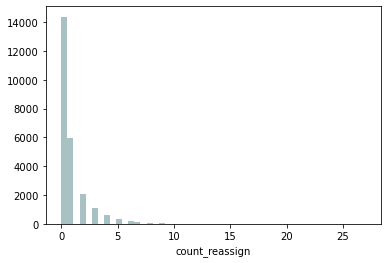

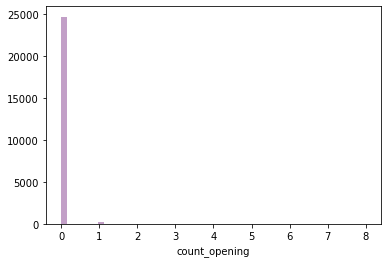

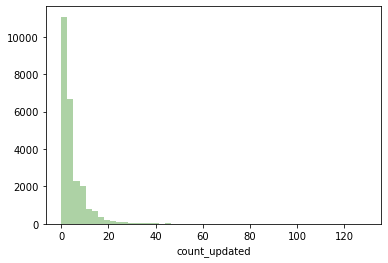

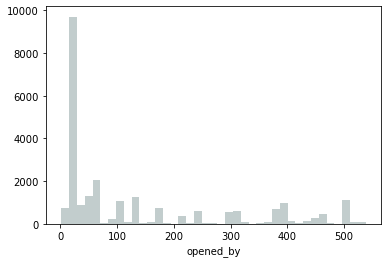

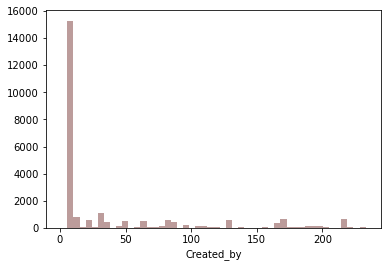

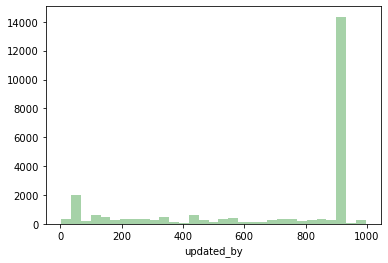

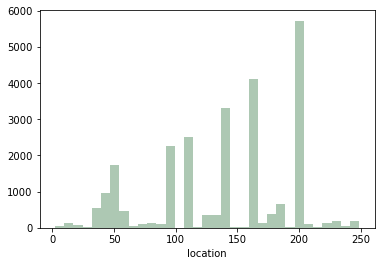

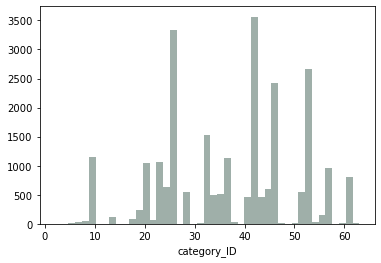

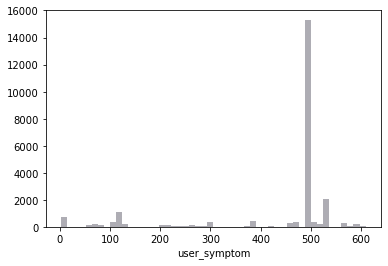

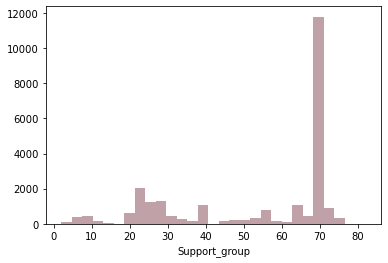

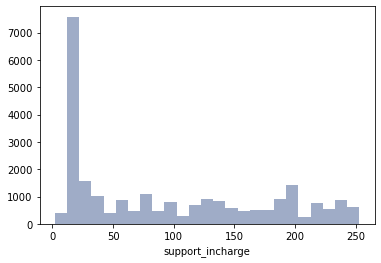

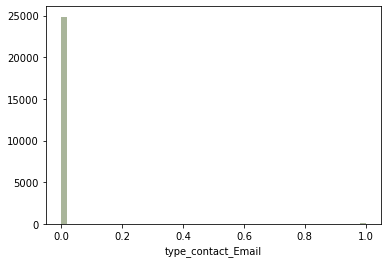

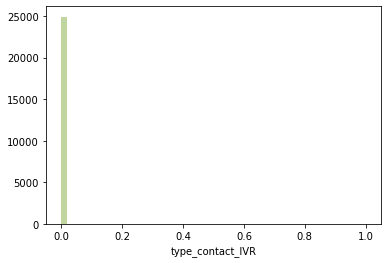

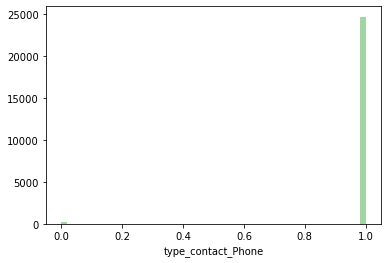

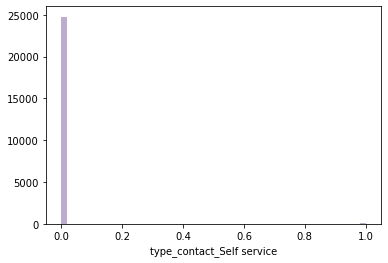

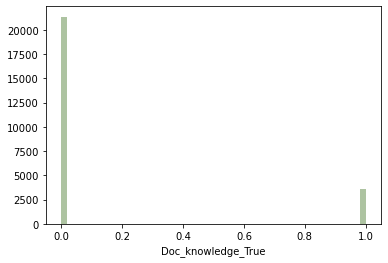

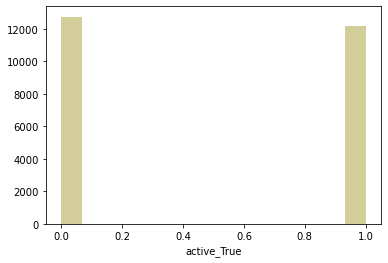

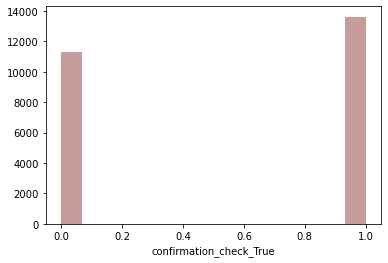

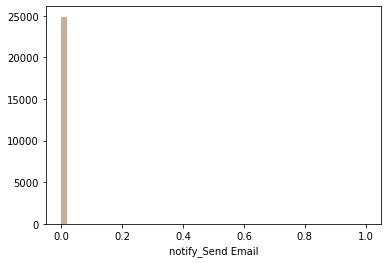

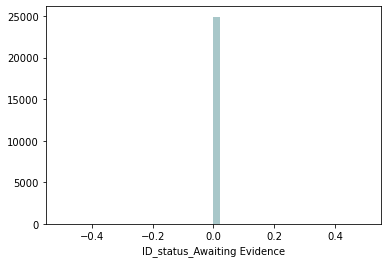

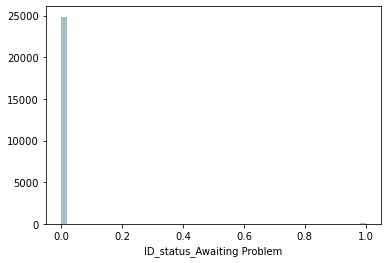

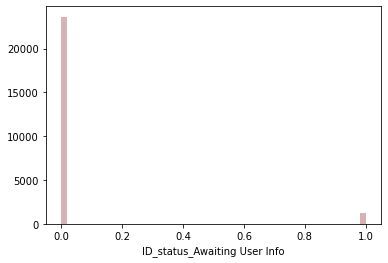

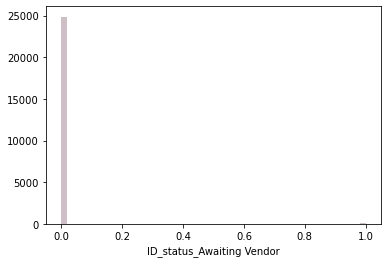

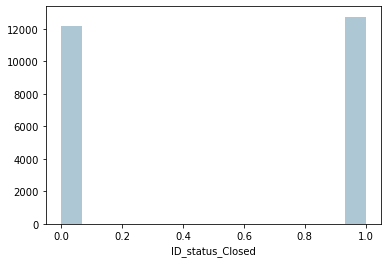

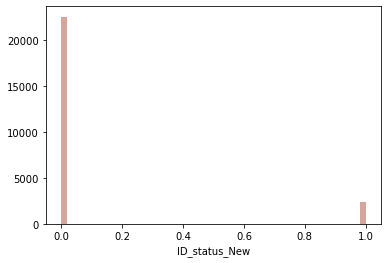

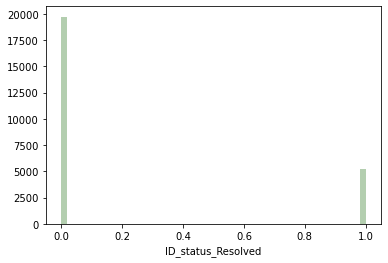

In [24]:
for i in X_train:
    plt.figure()
    cols = '#' + str(np.random.randint(100000,999999))
    sns.distplot(df[i], color = cols, kde= False)
    plt.show()
#columns need a transformation is
trans_cols = ['opened_by', 'Created_by', 'updated_by', 'location','category_ID', 'user_symptom', 'Support_group', 'support_incharge']

opened_by


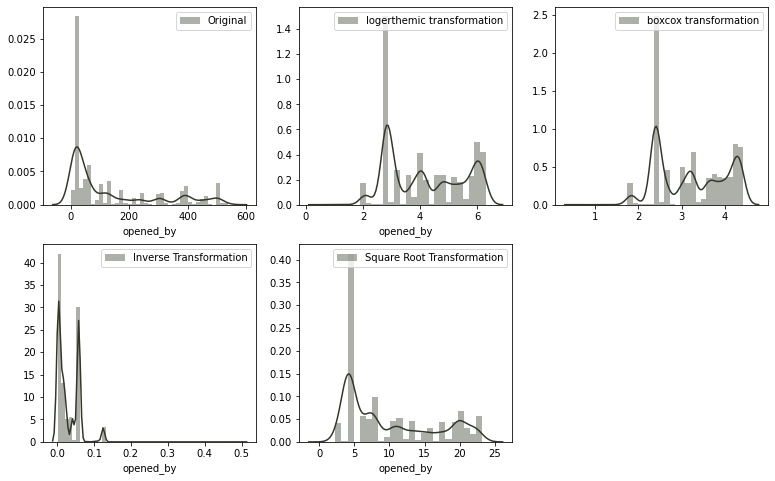

-------------------------------------------------------------------------
Created_by


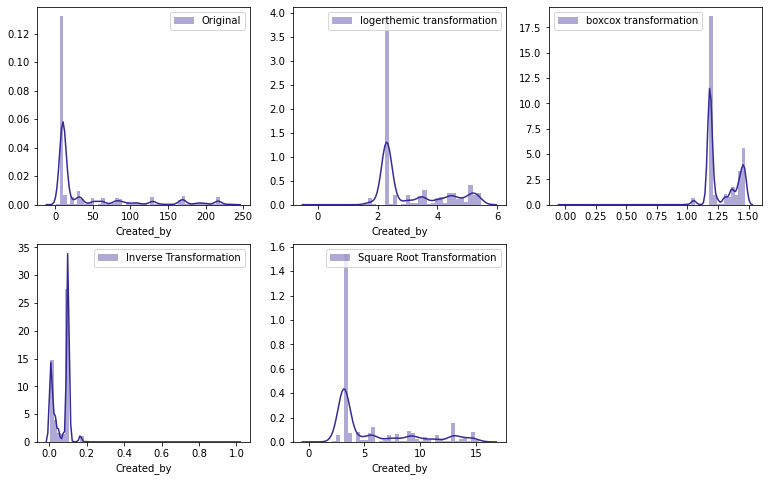

-------------------------------------------------------------------------
updated_by


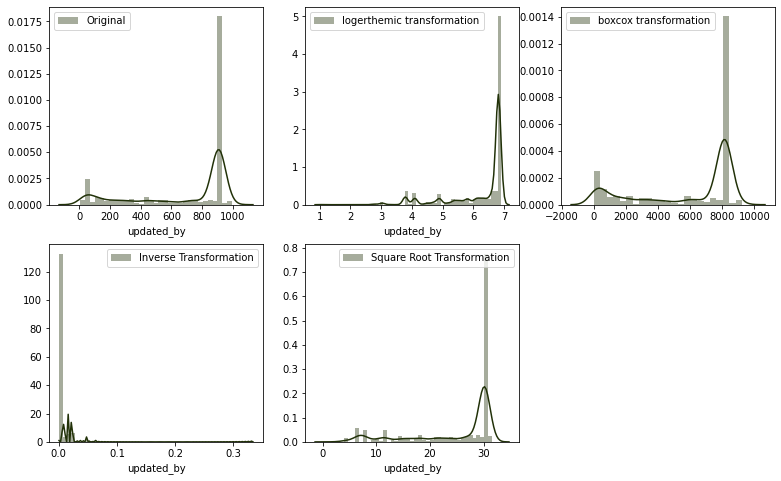

-------------------------------------------------------------------------
location


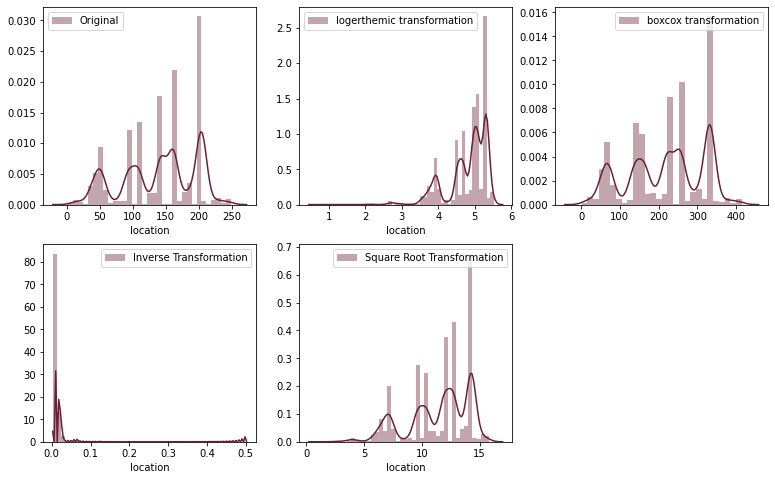

-------------------------------------------------------------------------
category_ID


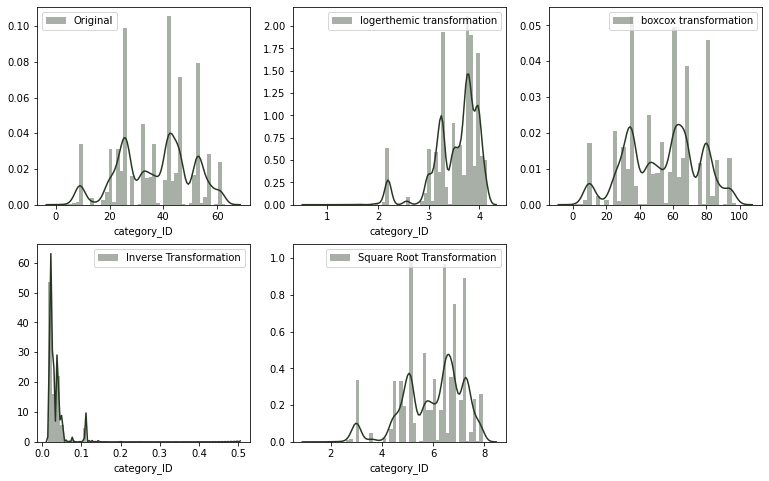

-------------------------------------------------------------------------
user_symptom


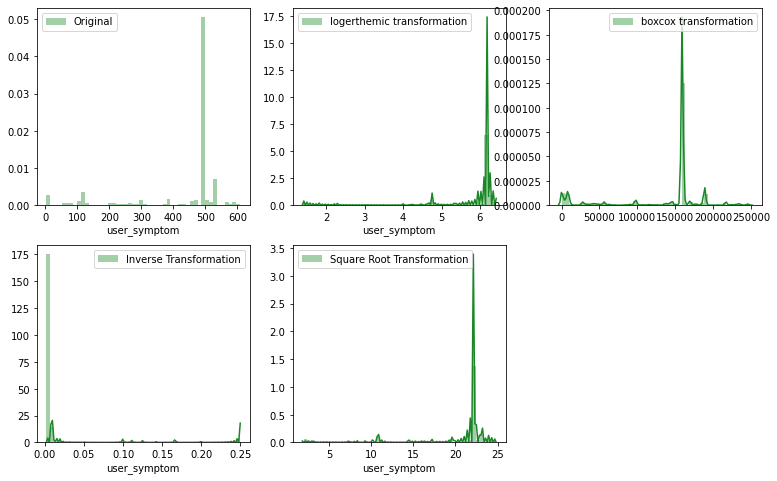

-------------------------------------------------------------------------
Support_group


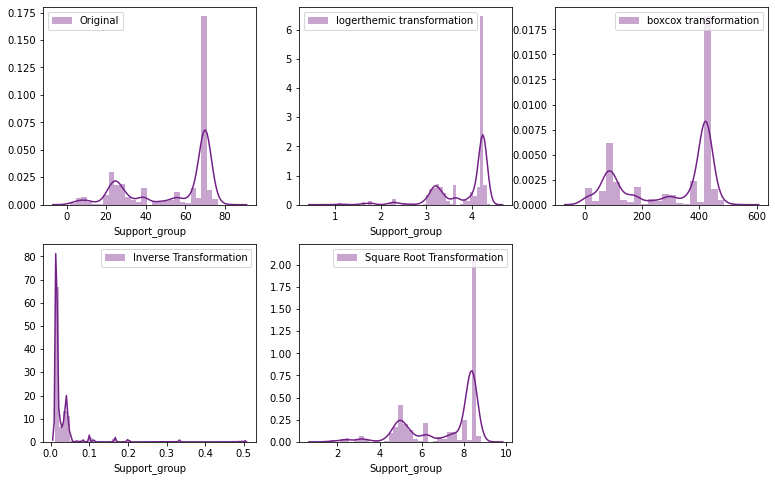

-------------------------------------------------------------------------
support_incharge


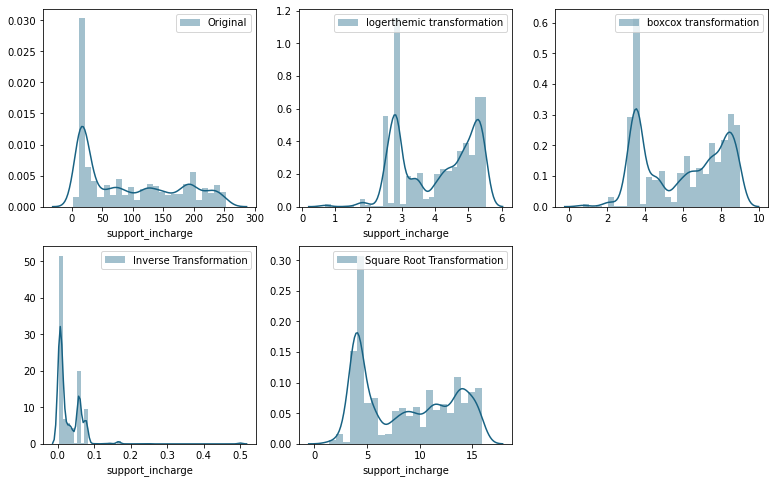

-------------------------------------------------------------------------


In [25]:
transformation_Df = pd.DataFrame()
for i in trans_cols:
    if df[i].all() != 0:
        print(i)
        plt.figure(figsize = (13,8))
        cols = '#' + str(np.random.randint(100000,999999))
        plt.subplot(2,3,1)
        transformation_Df[i + "_Original"] = X_train[i].values
        sns.distplot(df[i], color = cols, kde = True, label = "Original")
        plt.legend()
        plt.subplot(2,3,2)
        log_val = np.log(X_train[i])
        transformation_Df[i + '_log_val'] = log_val
        sns.distplot(log_val, color = cols, kde = True, label = "logerthemic transformation")
        plt.legend()
        plt.subplot(2,3,3)
        box_val,param = stats.boxcox(X_train[i])
        transformation_Df[i + '_box_val'] = box_val
        sns.distplot(box_val, color = cols, kde = True, label = "boxcox transformation")
        plt.legend()
        plt.subplot(2,3,4)
        inverse_val = (1/X_train[i])
        transformation_Df[i + '_inverse_val'] = inverse_val
        sns.distplot(inverse_val, color = cols, kde = True, label = "Inverse Transformation")
        plt.legend()
        plt.subplot(2,3,5)
        square_root_val = (X_train[i] ** (1/2))
        transformation_Df[i + '_square_root_val'] = square_root_val
        sns.distplot(square_root_val, color = cols, kde = True, label = "Square Root Transformation")
        plt.legend()
        plt.savefig(i + "_transformations", dpi = 200)
        plt.show()

        print('-------------------------------------------------------------------------')


In [26]:
#overall BoxCox transformation plays a better role

In [27]:
transformation_Df

,opened_by_Original,opened_by_log_val,opened_by_box_val,opened_by_inverse_val,opened_by_square_root_val,Created_by_Original,Created_by_log_val,Created_by_box_val,Created_by_inverse_val,Created_by_square_root_val,updated_by_Original,updated_by_log_val,updated_by_box_val,updated_by_inverse_val,updated_by_square_root_val,location_Original,location_log_val,location_box_val,location_inverse_val,location_square_root_val,category_ID_Original,category_ID_log_val,category_ID_box_val,category_ID_inverse_val,category_ID_square_root_val,user_symptom_Original,user_symptom_log_val,user_symptom_box_val,user_symptom_inverse_val,user_symptom_square_root_val,Support_group_Original,Support_group_log_val,Support_group_box_val,Support_group_inverse_val,Support_group_square_root_val,support_incharge_Original,support_incharge_log_val,support_incharge_box_val,support_incharge_inverse_val,support_incharge_square_root_val
0,180,5.192957,3.866357,0.005556,13.416408,81,4.394449,1.432896,0.012346,9.000000,908,6.811244,8144.427408,0.001101,30.133038,204,5.318120,331.849877,0.004902,14.282857,9,2.197225,9.860273,0.111111,3.000000,450,6.109248,133129.692188,0.002222,21.213203,25,3.218876,87.412525,0.040000,5.000000,125,4.828314,7.355497,0.008000,11.180340
1,40,3.688879,2.981654,0.025000,6.324555,20,2.995732,1.306177,0.050000,4.472136,908,6.811244,8144.427408,0.001101,30.133038,42,3.737670,56.498130,0.023810,6.480741,53,3.970292,80.163504,0.018868,7.280110,470,6.152733,145534.642767,0.002128,21.679483,54,3.988984,283.617324,0.018519,7.348469,17,2.833213,3.604478,0.058824,4.123106
2,180,5.192957,3.866357,0.005556,13.416408,10,2.302585,1.184292,0.100000,3.162278,908,6.811244,8144.427408,0.001101,30.133038,93,4.532599,138.024517,0.010753,9.643651,42,3.737670,61.286641,0.023810,6.480741,4,1.386294,7.867559,0.250000,2.000000,70,4.248495,421.263622,0.014286,8.366600,17,2.833213,3.604478,0.058824,4.123106
3,40,3.688879,2.981654,0.025000,6.324555,10,2.302585,1.184292,0.100000,3.162278,908,6.811244,8144.427408,0.001101,30.133038,172,5.147494,274.345568,0.005814,13.114877,53,3.970292,80.163504,0.018868,7.280110,470,6.152733,145534.642767,0.002128,21.679483,72,4.276666,439.742632,0.013889,8.485281,17,2.833213,3.604478,0.058824,4.123106
4,24,3.178054,2.643045,0.041667,4.898979,13,2.564949,1.237074,0.076923,3.605551,908,6.811244,8144.427408,0.001101,30.133038,108,4.682131,163.155126,0.009259,10.392305,53,3.970292,80.163504,0.018868,7.280110,471,6.154858,146169.743943,0.002123,21.702534,54,3.988984,283.617324,0.018519,7.348469,17,2.833213,3.604478,0.058824,4.123106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17280,508,5.720312,4.390076,0.003279,17.464249,10,4.867534,1.184292,0.007692,11.401754,931,6.811244,8428.007717,0.001101,30.133038,246,5.318120,408.855834,0.004902,14.282857,50,3.610918,74.955367,0.027027,6.082763,533,6.196444,188316.561812,0.002037,22.158520,70,3.218876,421.263622,0.040000,5.000000,17,4.941642,3.604478,0.007143,11.832160
17281,508,5.720312,4.390076,0.003279,17.464249,10,2.302585,1.184292,0.100000,3.162278,908,6.811244,8144.427408,0.001101,30.133038,246,5.318120,408.855834,0.004902,14.282857,50,4.043051,74.955367,0.017544,7.549834,533,6.196444,188316.561812,0.002037,22.158520,70,4.248495,421.263622,0.014286,8.366600,17,5.010635,3.604478,0.006667,12.247449
17282,508,6.137727,4.390076,0.002160,21.517435,10,2.302585,1.184292,0.100000,3.162278,908,6.740519,8144.427408,0.001182,29.086079,246,4.962845,408.855834,0.006993,11.958261,50,3.828641,74.955367,0.021739,6.782330,533,6.196444,188316.561812,0.002037,22.158520,70,4.248495,421.263622,0.014286,8.366600,17,5.384495,3.604478,0.004587,14.764823
17283,508,5.966147,4.390076,0.002564,19.748418,10,5.129899,1.184292,0.005917,13.000000,908,6.811244,8144.427408,0.001101,30.133038,246,5.318120,408.855834,0.004902,14.282857,50,3.610918,74.955367,0.027027,6.082763,533,6.196444,188316.561812,0.002037,

In [28]:
for i in transformation_Df:
    if "box" not in i.split("_") and 'Original' not in i.split("_"):
        transformation_Df.drop(i, inplace = True, axis = 1)

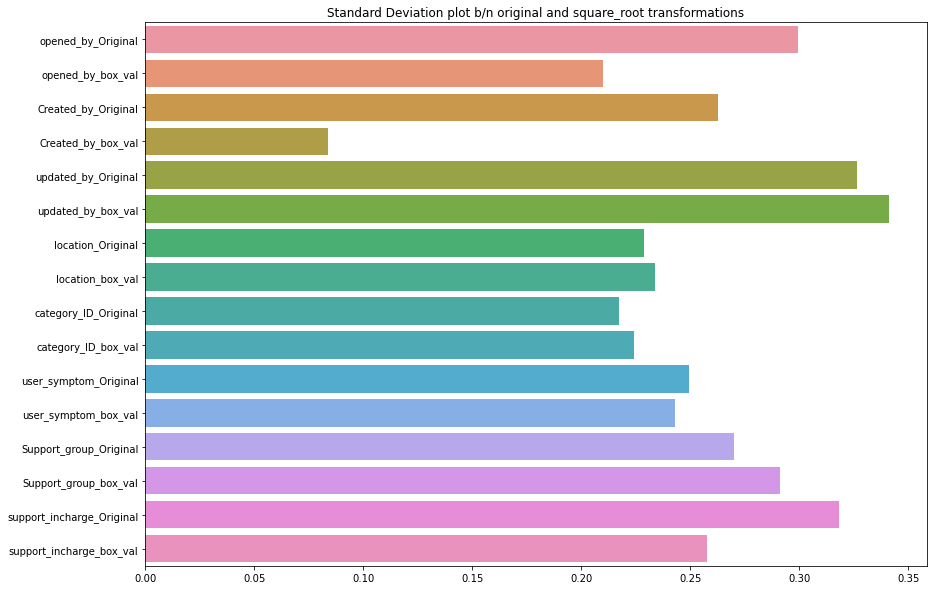

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(transformation_Df)
transformation_Df = pd.DataFrame(scaled, columns = transformation_Df.columns)
plt.figure(figsize = (14,10))
sns.barplot(x = transformation_Df.std(), y = transformation_Df.columns)
plt.title("Standard Deviation plot b/n original and square_root transformations")
plt.savefig("SD plot of the transformations", dpi = 200)
plt.show()

In [30]:
df.head(3)

,count_reassign,count_opening,count_updated,opened_by,Created_by,updated_by,location,category_ID,user_symptom,impact,Support_group,support_incharge,updated_date,opened_date,type_contact_Email,type_contact_IVR,type_contact_Phone,type_contact_Self service,Doc_knowledge_True,active_True,confirmation_check_True,notify_Send Email,ID_status_Awaiting Evidence,ID_status_Awaiting Problem,ID_status_Awaiting User Info,ID_status_Awaiting Vendor,ID_status_Closed,ID_status_New,ID_status_Resolved
0,0,0,3,180,81,908,204,9,450,2,25,125,2016-03-07,2016-02-29,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,6,40,20,908,42,53,470,2,54,17,2016-03-06,2016-02-29,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,2,180,10,908,93,42,4,2,70,17,2016-03-05,2016-02-29,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [31]:
#Apply BoxCox Transformations to all that columns
params_dict = {}
for i in trans_cols:
    X_train[i], params = stats.boxcox(X_train[i])
    params_dict[i] = params

In [32]:
params_dict

{'opened_by': -0.11980295768192453,
 'Created_by': -0.659398684035357,
 'updated_by': 1.3681227689233153,
 'location': 1.1119546935896987,
 'category_ID': 1.1399506666633892,
 'user_symptom': 2.048748504496528,
 'Support_group': 1.521619410812126,
 'support_incharge': 0.16364764064012957}

In [33]:
X_train.head(3)

,count_reassign,count_opening,count_updated,opened_by,Created_by,updated_by,location,category_ID,user_symptom,Support_group,support_incharge,type_contact_Email,type_contact_IVR,type_contact_Phone,type_contact_Self service,Doc_knowledge_True,active_True,confirmation_check_True,notify_Send Email,ID_status_Awaiting Evidence,ID_status_Awaiting Problem,ID_status_Awaiting User Info,ID_status_Awaiting Vendor,ID_status_Closed,ID_status_New,ID_status_Resolved
0,0,0,3,3.866357,1.432896,8144.427408,331.849877,9.860273,133129.692188,87.412525,7.355497,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,6,2.981654,1.306177,8144.427408,56.498130,80.163504,145534.642767,283.617324,3.604478,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,2,3.866357,1.184292,8144.427408,138.024517,61.286641,7.867559,421.263622,3.604478,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [34]:
sqrt_col_trans = ['count_reassign', 'count_opening', 'count_updated']

for i in sqrt_col_trans:
    X_train[i] = X_train ** (1/2)

In [35]:
X_train.head(3)

,count_reassign,count_opening,count_updated,opened_by,Created_by,updated_by,location,category_ID,user_symptom,Support_group,support_incharge,type_contact_Email,type_contact_IVR,type_contact_Phone,type_contact_Self service,Doc_knowledge_True,active_True,confirmation_check_True,notify_Send Email,ID_status_Awaiting Evidence,ID_status_Awaiting Problem,ID_status_Awaiting User Info,ID_status_Awaiting Vendor,ID_status_Closed,ID_status_New,ID_status_Resolved
0,0.0,0.0,0.0,3.866357,1.432896,8144.427408,331.849877,9.860273,133129.692188,87.412525,7.355497,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,1.0,1.0,1.0,2.981654,1.306177,8144.427408,56.498130,80.163504,145534.642767,283.617324,3.604478,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,0.0,3.866357,1.184292,8144.427408,138.024517,61.286641,7.867559,421.263622,3.604478,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_x = scaler.fit_transform(X_train)

# feature Selection

In [37]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [38]:
features_selection1 = SelectFromModel(Lasso(alpha = 0.001))

In [39]:
features = features_selection1.fit(X_train,Y_train)

In [40]:
features

SelectFromModel(estimator=Lasso(alpha=0.001))

In [41]:
print(features.get_support())



[False  True False  True False False  True  True False  True  True False
 False False False  True  True  True False False False False False  True
  True  True]


In [42]:
feature_1 = X_train.columns[features.get_support()]
print(feature_1)

Index(['count_opening', 'opened_by', 'location', 'category_ID', 'Support_group', 'support_incharge', 'Doc_knowledge_True', 'active_True', 'confirmation_check_True', 'ID_status_Closed', 'ID_status_New', 'ID_status_Resolved'], dtype='object')


In [43]:
features_selection2 = SelectFromModel(Lasso(alpha = 0.001))
features2 = features_selection2.fit(X_train,Y_train)
print(features2.get_support())
feature_2 = X_train.columns[features2.get_support()]
print(feature_2)

[False  True False  True False False  True  True False  True  True False
 False False False  True  True  True False False False False False  True
  True  True]
Index(['count_opening', 'opened_by', 'location', 'category_ID', 'Support_group', 'support_incharge', 'Doc_knowledge_True', 'active_True', 'confirmation_check_True', 'ID_status_Closed', 'ID_status_New', 'ID_status_Resolved'], dtype='object')


2) feature selection using SelectKBest

In [44]:
from sklearn.feature_selection import SelectKBest, chi2

In [45]:
features_selection3 = SelectKBest(chi2, k = 15).fit(X_train,Y_train)

In [46]:
feature_3 = X_train.columns[features_selection3.get_support()]
print(feature_3)

Index(['count_reassign', 'count_opening', 'count_updated', 'opened_by', 'updated_by', 'location', 'category_ID', 'user_symptom', 'Support_group', 'support_incharge', 'type_contact_IVR', 'type_contact_Self service', 'Doc_knowledge_True', 'confirmation_check_True', 'ID_status_Awaiting Problem'], dtype='object')


In [47]:
from sklearn.ensemble import ExtraTreesClassifier

In [48]:
etc = ExtraTreesClassifier()
etc.fit(X_train,Y_train)

ExtraTreesClassifier()

In [49]:
feature4 = etc.feature_importances_

In [50]:
feature4

array([2.32727265e-02, 2.33851596e-02, 2.32172768e-02, 1.67800860e-01,
       8.53346362e-02, 5.97719785e-02, 1.29319898e-01, 1.06088255e-01,
       9.01642220e-02, 8.37343846e-02, 1.20524572e-01, 2.68950331e-04,
       8.07553142e-03, 1.78149333e-03, 1.15677685e-03, 1.59622698e-02,
       5.80477680e-03, 1.50580264e-02, 1.52755591e-04, 0.00000000e+00,
       2.37968784e-03, 8.23601218e-03, 1.02607081e-04, 6.00629721e-03,
       7.17371746e-03, 1.52271294e-02])

In [51]:
feat_imp = pd.Series(feature4, index = X_train.columns)

In [52]:
feat_imp = feat_imp.nlargest(20)

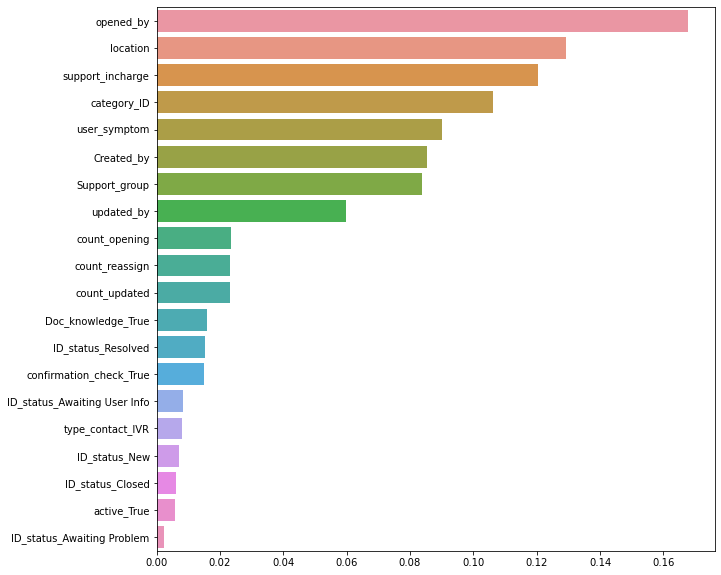

In [53]:
plt.figure(figsize = (10,10))
sns.barplot(x = feat_imp, y = feat_imp.index)

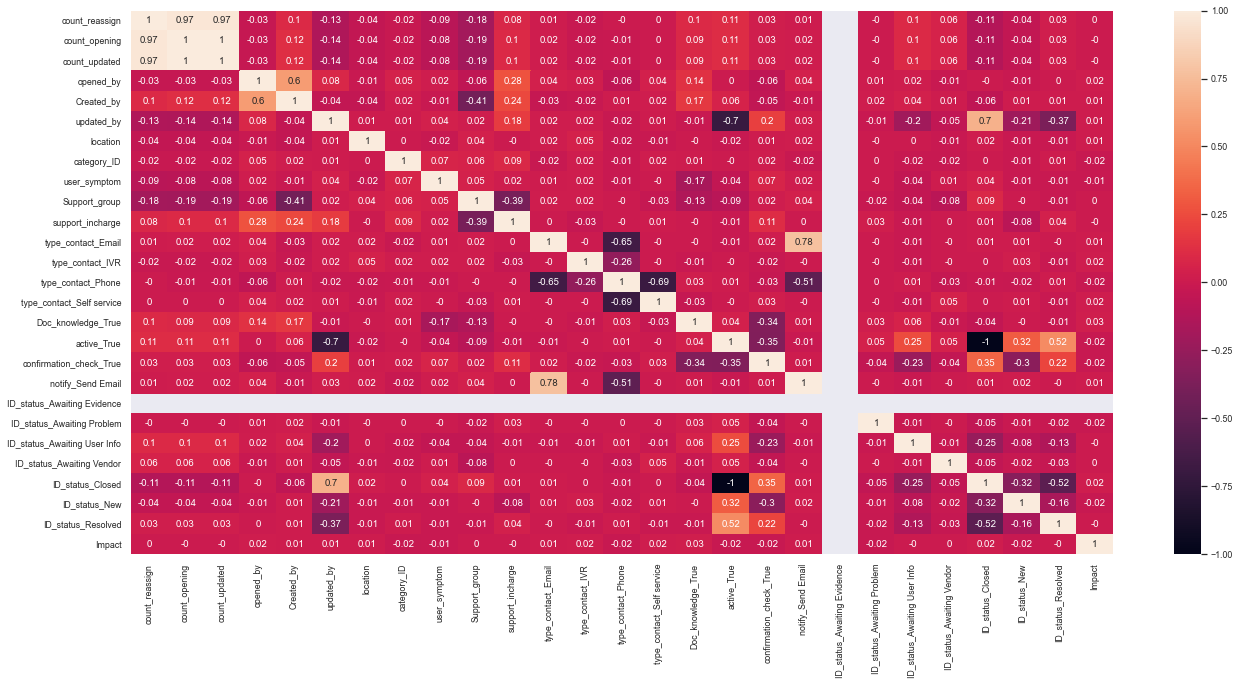

In [54]:
y_tr_series = pd.Series(Y_train, name = "Impact")
corr_Df  = pd.concat([X_train,y_tr_series], axis =1)
plt.figure(figsize = (22,10))
sns.set(font_scale = 0.8)
sns.heatmap(corr_Df.corr().apply(lambda x : np.around(x, 2)), annot = True)
plt.show()

1) self-service and phone

2) active and closed

3) active and updated_by

4) email and notify

5) count_opening, count_reassign and count_updated


These are highly intercorrelated between each other.

Nothing is correlated between impact variable

In [55]:
#from conclustion based on the all feature selection types
fin_feature = ['opened_by', 'Created_by', 'updated_by', 'location', 'category_ID', 'user_symptom', 'support_incharge', 'Support_group', 'Doc_knowledge_True', 'confirmation_check_True']

In [56]:
X_train = X_train[fin_feature]

In [57]:
X_train.reset_index(inplace = True)
X_train.drop('index', axis = 1, inplace = True)

In [58]:
X_test = X_test[fin_feature]

In [59]:
Y_train = pd.Series(Y_train, name = "Impact")
Y_test = pd.Series(Y_test, name= "Impact")

In [60]:
train_data = pd.concat([X_train,Y_train], axis = 1)


In [61]:
X_test.reset_index(inplace = True)
X_test.drop('index', axis = 1, inplace = True)
test_data = pd.concat([X_test,Y_test], axis = 1)

In [62]:
test_data.head()

,opened_by,Created_by,updated_by,location,category_ID,user_symptom,support_incharge,Support_group,Doc_knowledge_True,confirmation_check_True,Impact
0,397,10,908,143,46,491,191,70,0,0,2
1,397,10,908,143,20,491,191,70,0,0,2
2,397,10,908,204,42,491,191,70,0,1,2
3,397,10,908,161,9,491,191,70,0,1,2
4,17,10,908,108,46,491,155,57,0,1,2


In [63]:
train_data.to_csv("train_data.csv", index = False)
test_data.to_csv("test_data.csv", index = False)

In [64]:
X_train

,opened_by,Created_by,updated_by,location,category_ID,user_symptom,support_incharge,Support_group,Doc_knowledge_True,confirmation_check_True
0,3.866357,1.432896,8144.427408,331.849877,9.860273,133129.692188,7.355497,87.412525,1,0
1,2.981654,1.306177,8144.427408,56.498130,80.163504,145534.642767,3.604478,283.617324,1,0
2,3.866357,1.184292,8144.427408,138.024517,61.286641,7.867559,3.604478,421.263622,1,0
3,2.981654,1.184292,8144.427408,274.345568,80.163504,145534.642767,3.604478,439.742632,1,0
4,2.643045,1.237074,8144.427408,163.155126,80.163504,146169.743943,3.604478,283.617324,1,0
...,...,...,...,...,...,...,...,...,...,...
17280,4.390076,1.184292,8428.007717,408.855834,74.955367,188316.561812,3.604478,421.263622,0,0
17281,4.390076,1.184292,8144.427408,408.855834,74.955367,188316.561812,3.604478,421.263622,0,0
17282,4.390076,1.184292,8144.427408,408.855834,74.955367,188316.561812,3.604478,421.263622,0,0
17283,4.390076,1.184292,8144.427408,408.855834,74.955367,188316.561812,3.604478,421.263622,0,0


In [65]:
train_data.isnull().sum()

opened_by                  0
Created_by                 0
updated_by                 0
location                   0
category_ID                0
user_symptom               0
support_incharge           0
Support_group              0
Doc_knowledge_True         0
confirmation_check_True    0
Impact                     0
dtype: int64